In [311]:
#   A Very Simple Neural Network in Python 
#   with Numpy for Activation Functions Testing
#   Ph.D(c). Manuel Andres Velez - 2020

import numpy as np
import matplotlib.pyplot as plt
import math, time

In [312]:
batchSize = 4

#Epoch:
epochs = 4500

#Activation Functions:
#activation = 'sigmoid'
activation = 'tanh'
#activation = 'ReLU'

#Learning Rates (entre 0 y 1):
LR_sigmoid = 0.000
LR_tanh = 0.18
LR_ReLU = 0.000

In [313]:
def f(x): return np.sin(x)
 
minx, maxx = 0, 6.28
miny, maxy = -1, 1
numx = int(maxx * 5 + 1)
inputLayerSize, hiddenLayerSize, outputLayerSize = 2, 5, 1
 
funcs = {'sigmoid':  (lambda x: 1/(1 + np.exp(-x)),
                      lambda x: x * (1 - x),  (0,  1), LR_sigmoid),
            'tanh':  (lambda x: np.tanh(x),
                      lambda x: 1 - x**2,     (0, -1), LR_tanh),
            'ReLU':  (lambda x: x * (x > 0),
                      lambda x: x > 0,        (0, maxx), LR_ReLU),
        }
(activate, activatePrime, (mina, maxa), L) = funcs[activation]
 
X = x = np.linspace(minx, maxx, num=numx)
X.shape = (numx, 1)
Y = y = f(X)
Y = (Y - miny)*(maxa - mina)/(maxy - miny) + mina   # normalise into activation

In [314]:
# add a bias unit to the input layer
X = np.concatenate((np.atleast_2d(np.ones(X.shape[0])).T, X), axis=1)

In [315]:
# Random initial weights
r0 = math.sqrt(2.0/(inputLayerSize))
r1 = math.sqrt(2.0/(hiddenLayerSize))
Wh = np.random.uniform(size=(inputLayerSize, hiddenLayerSize),low=-r0,high=r0)
Wz = np.random.uniform(size=(hiddenLayerSize,outputLayerSize),low=-r1,high=r1)

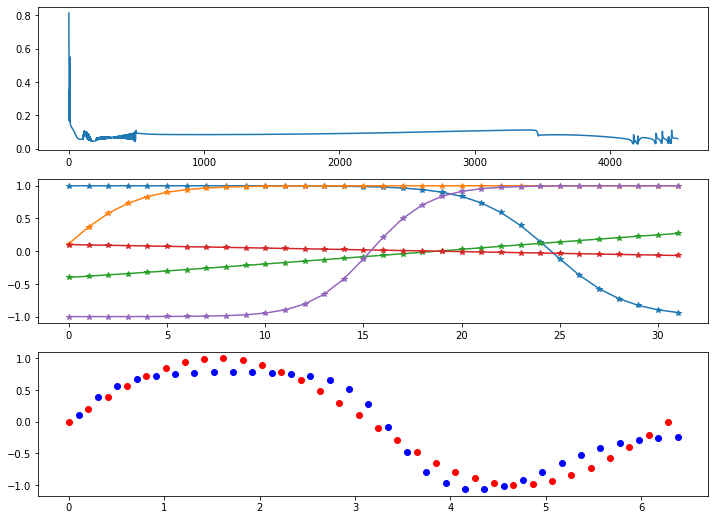

[ 2 5 1 ] Activation: tanh Iterations: 4500 Learning rate: 0.18 Final loss: 0.05952200021686793 Time: 1.3482592105865479


In [316]:
def next_batch(X, Y):
    for i in np.arange(0, X.shape[0], batchSize):
        yield (X[i:i + batchSize], Y[i:i + batchSize])
 
start = time.time()
lossHistory = []
 
for i in range(epochs):         # Training:
    epochLoss = []
 
    for (Xb, Yb) in next_batch(X, Y):
 
        H = activate(np.dot(Xb, Wh))            # hidden layer results
        Z = activate(np.dot(H,  Wz))            # output layer results
        E = Yb - Z                              # how much we missed (error)
        epochLoss.append(np.sum(E**2))
 
        dZ = E * activatePrime(Z)               # delta Z
        dH = dZ.dot(Wz.T) * activatePrime(H)    # delta H
        Wz += H.T.dot(dZ) * L                   # update output layer weights
        Wh += Xb.T.dot(dH) * L                  # update hidden layer weights
 
    mse = np.average(epochLoss)
    lossHistory.append(mse)
 
X[:, 1] += maxx/(numx-1)/2
H = activate(np.dot(X, Wh))
Z = activate(np.dot(H, Wz))
Z = ((miny - maxy) * Z - maxa * miny + maxy * mina)/(mina - maxa)
Y = y
 
end = time.time()
 
plt.figure(figsize=(12, 9))
plt.subplot(311)
plt.plot(lossHistory)
plt.subplot(312)
plt.plot(H, '-*')
plt.subplot(313)
plt.plot(x, Y, 'ro')    # training data
plt.plot(X[:, 1], Z, 'bo')   # learned
plt.show()
 
print('[', inputLayerSize, hiddenLayerSize, outputLayerSize, ']',
      'Activation:', activation, 'Iterations:', epochs,
      'Learning rate:', L, 'Final loss:', mse, 'Time:', end - start)

**Gold Standard** (Manuel Velez): Sigmoide / Epoch = 1700 / a =  0.2 (20%)

Se obtuvo: 

Final Loss (error)= 0.04236678675563427

Tiempo = 0.5554773807525635 s

Tarea: Modificar los parámetros del aprendizaje (LR/ Epoch/AF) para hacer que la red neuronal aprenda lo mejor posible (disminuyendo la cantidad de error lo mas que se pueda) y lo más rapido posible.